# 4. Write a program to perform the Huffman coding and decoding techniques on an image and compute Compression Ratio.

Compression Ratio: 1.92


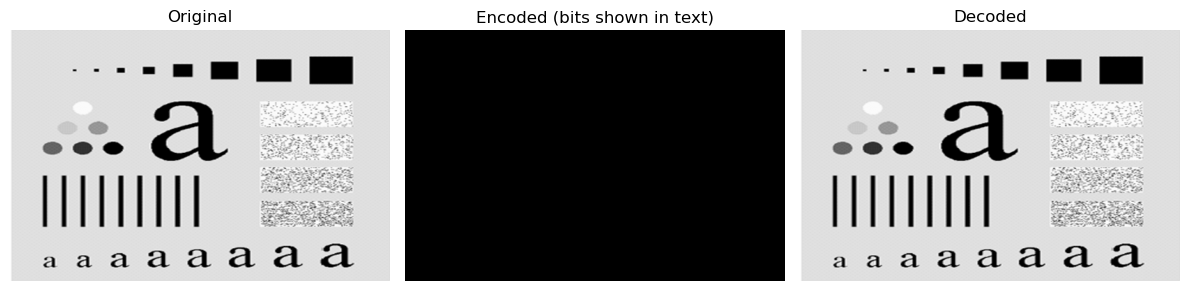

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict, Counter

class Node:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freq_dict):
    heap = [Node(sym, freq) for sym, freq in freq_dict.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        n1 = heapq.heappop(heap)
        n2 = heapq.heappop(heap)
        merged = Node(None, n1.freq + n2.freq)
        merged.left = n1
        merged.right = n2
        heapq.heappush(heap, merged)
    return heap[0]

def generate_codes(node, prefix="", codebook={}):
    if node:
        if node.symbol is not None:
            codebook[node.symbol] = prefix
        generate_codes(node.left, prefix + "0", codebook)
        generate_codes(node.right, prefix + "1", codebook)
    return codebook

def huffman_encoding(img):
    flat = img.flatten()
    freq_dict = Counter(flat)
    root = build_huffman_tree(freq_dict)
    codebook = generate_codes(root)

    encoded_bits = ''.join(codebook[p] for p in flat)
    return encoded_bits, codebook, img.shape

def huffman_decoding(encoded_bits, codebook, shape):
    reverse_codebook = {v: k for k, v in codebook.items()}
    decoded_pixels = []
    code = ""
    for bit in encoded_bits:
        code += bit
        if code in reverse_codebook:
            decoded_pixels.append(reverse_codebook[code])
            code = ""
    return np.array(decoded_pixels, dtype=np.uint8).reshape(shape)

def compute_compression_ratio(original_img, encoded_bits):
    original_bits = original_img.size * 8  
    compressed_bits = len(encoded_bits)
    ratio = original_bits / compressed_bits
    return ratio

def read_img(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image can not read at {path}")
    return img

def plot_imgs(original, encoded_img, decoded_img):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(np.zeros_like(original), cmap='gray')
    plt.title("Encoded (bits shown in text)")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(decoded_img, cmap='gray')
    plt.title("Decoded")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def main():
    img = read_img("../test_imgs/test_img.png")

    encoded_bits, codebook, shape = huffman_encoding(img)
    decoded_img = huffman_decoding(encoded_bits, codebook, shape)
    ratio = compute_compression_ratio(img, encoded_bits)

    print(f"Compression Ratio: {ratio:.2f}")
    plot_imgs(img, encoded_bits, decoded_img)

if __name__=="__main__":
    main()
